# Assignment 2


## Instructions

Please complete this Jupyter notebook and then convert it to a `.py` file called `assignment2.py`. Upload this file to Gradescope, and await feedback. 

You may submit as many times as you want up until the deadline. Only your latest submission counts toward your grade.

Some tests are hidden and some are visible. The outcome of the visible checks will be displayed to you immediately after you submit to Gradescope. The hidden test outcomes will be revealed after final scores are published. 

This means that an important part of any strategy is to **start early** and **lock in all the visible test points**. After that, brainstorm what the hidden checks could be and collaborate with your teammates.


In [1]:
import scipy
import math

### Problem 1


Recall the derivation of the posterior when you had a binomial data point, and a uniform prior:

\begin{align}
\pi(\theta \mid y) 
&\propto L(y \mid \theta) \pi(\theta) \\
&= \binom{n}{y} \theta^y (1-\theta)^{n-y} \mathbb{1}(0 < \theta < 1 ) \\
&\propto
\theta^y (1-\theta)^{n-y}
\end{align}

Suppose $n=400$ and $y=250$.

1.

What is the natural logarithm of the normalizing constant? In other words, what do we have to divide $\theta^y (1-\theta)^{n-y}$ by so that it integrates to $1$? Then take the natural log of that. 

Stated differently, what is $\log \int_0^1 \theta^y (1-\theta)^{n-y} \text{d} \theta$? 


Assign your answer to `log_norm_const`

NB1: if we didn't use the logarithm, the normalizing constant would be *way* too close to $0$.


NB2: You're not doing calculus here. The integral is just a special formula, and the formula is implemented in the `scipy.special` submodule.

In [2]:
n = 400
y = 250
a = y + 1
b = n - y + 1
log_norm_const = math.log(scipy.special.beta(a, b))

2. 

Are either of these dependent on the value of $\theta$? If yes, assign `True` to `dependent_on_theta`. Otherwise assign `False`

In [3]:
# "either"?
dependent_on_theta = False

### Problem 2


Suppose

$$\pi(\theta) = \text{Beta}(a,b),$$ 
 
and

$$L(y \mid \theta) = \text{Binomial}(n,\theta)$$

Show that $\pi(\theta \mid y) = \text{Beta}(a + y, n+b - y)$. Upload a scanned copy of your work to Gradescope portal.

### Problem 3


Suppose

$$\pi(\theta) = \text{Beta}(a,b),$$ 
 
for some fixed/chosen $a,b > 0$. Suppose further that you have $m > 1$ count data points $y_1, \ldots, y_m$, each having a $\text{Binomial}(n,\theta)$ distribution.

1. What is the likelihood of $y_1, \ldots, y_m$ assuming they're all independent (conditioning on one $\theta$ value)?
2. What is the posterior distribution?

Upload a scanned copy of your work to Gradescope portal.

### Problem 4: Roulette!

In the game of **Roulette** the croupier spins a wheel and a ball, and you bet on where the ball will end up. Suppose you're interested in testing whether all possible outcomes are equally likely. Consider the fake data below.

![roulette.jpg](roulette.jpg)

In [4]:
# do not edit this cell!
import numpy as np
import pandas as pd

# Define the possible numbers on the roulette wheel
numbers = np.arange(0, 38)  # 0 to 36 for numbers, 37 for double zero
# Define the colors of the numbers
colors = ['green'] + ['red', 'black'] * 18  + ['green']

num_rows = 100
my_data = pd.DataFrame({'number':np.random.choice(numbers, num_rows)})
my_data['color'] = my_data.number.apply( lambda num : colors[num])
my_data.head()

,number,color
0,3,red
1,26,black
2,15,red
3,13,red
4,34,black


Suppose $\theta$ is the probability the ball lands on red.

1. Choose a Beta prior for $\theta$. Assign your prior hyperparameters to the variables `prior_hyperparam1` and `prior_hyperparam2`. Make sure the mean of your prior is $18/38$!

Hint: do the previous problem first, and notice that, in this case, $n=1$ and $m=100$

In [5]:
prior_hyperparam1 = 18
prior_hyperparam2 = 20

2. Use the simulated data above, and come up with a posterior. Assign the parameters of the beta distribution to `posterior_hyperparam1` and `posterior_hyperparam2`



In [6]:
n = 100
y = my_data.query("color == 'red'").shape[0]
posterior_hyperparam1 = y + prior_hyperparam1
posterior_hyperparam2 = n - y + prior_hyperparam2
pos1 = posterior_hyperparam1
pos2 = posterior_hyperparam2

3. Calculate a 95% *credible interval* for theta. Assign your answer to a `tuple` called `my_interval`


In [7]:
my_interval = scipy.stats.beta(pos1, pos2).ppf(0.025), scipy.stats.beta(pos1, pos2).ppf(0.975)
my_interval

(0.37444252629179187, 0.539795026630661)

4. Simulate $1000$ times from the posterior predictive distribution. Call your samples `post_pred_samples`.

<Axes: ylabel='Frequency'>

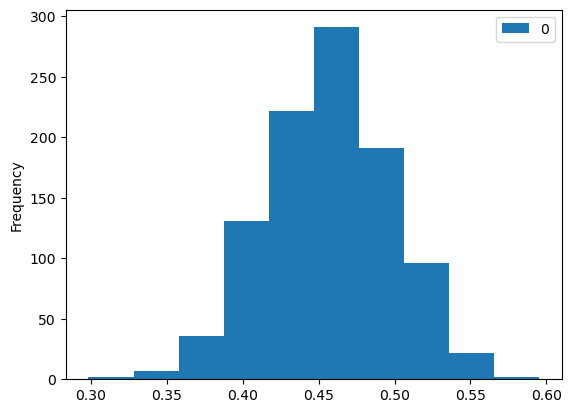

In [8]:
post_pred_samples = list(np.random.beta(pos1, pos2, size = 1000))
pd.DataFrame(post_pred_samples).plot(kind = 'hist')

In [9]:
 pos1

63